In [1]:
%matplotlib inline 

# Numero PI

PI es la relacion entre la longitud y diametro de una circunferencia.
Su numero a sido aproximado a traves de la historia, y es una de las constantes mas utilizadas, junto con el numero e.

Arquimides lo calculo con la aproximacion

$3 + \dfrac{10}{71} < pi < 3 + \dfrac{1}{7}$

En el antiguo Egipto se aproximaba el valor de pi, con la idea de que 
el area de un circulo es similar a la de un cuadrado que su lado es igual a  $\dfrac{8}{9}$  del diametro del circulo.

En Mesopotamia (1900 a. C.) aproximaban pi con  $pi = 3 + \dfrac{1}{8}$

En el siglo II Claudio Ptolomeo aproximo pi con $pi = \dfrac{377}{120}$

## Epoca moderna
Actualmente mediante el uso de computadores es posible calcular con mucha mas precision el valor de pi. El descubrimiento de estas cifras se acelero junto con el desarrollo de la computacion. Desde 1949 donde se obtuvieron $2037$ cifras, al 2011 donde se llego a calcular $10.000.000.000.000$ cifras de pi.

## Caracteristica de PI
1. PI es la razon entre la longitud de una circunferencia y su diametro
2. PI es el area de un circulo de radio con longitud 1

## Estimar pi con el metodo de montecarlo

Este metodo consiste en tener un circulo y un cuadrado cuyo centro se encuentra en el mismo punto, 
osea que el circulo esta inscrito dentro del cuadrado.
El largo de los lados del cuadrado y el radio del circulo siguen la siguiente proporcion:

Luego se comienzan a generar puntos aleatorios y se verifica si estos puntos se encuentran o no dentro del
circulo. A partir del numero de puntos dentro del circulo (M), el numero total de puntos generados (N) y PI, se 
tiene la siguiente igualdad



In [2]:
%%latex
$\dfrac{N}{M} = \dfrac{AreaCuadrado}{AreaCirculo} = \dfrac{(r*2)^2}{pi * r^ 2} = \dfrac{4}{pi}$

<IPython.core.display.Latex object>

In [3]:
%%markdown
A partir de esta igualdad se obtiene π

A partir de esta igualdad se obtiene π



In [4]:
%%latex
$pi = 4 * \dfrac{M}{N}$

<IPython.core.display.Latex object>

In [5]:
%%markdown
```
M: numero de puntos dentro del circulo
N: numero total de puntos generados
```

```
M: numero de puntos dentro del circulo
N: numero total de puntos generados
```

## Codigo simulacion

In [6]:
import matplotlib.pyplot as plt
import random
import math

In [14]:
radio_circulo = 1
lado_cuadrado = 2 * radio_circulo

In [15]:
def punto_dentro_circulo(x, y, centro_circulo):
    return math.sqrt((abs(x - radio_circulo)**2) 
                     + (abs(y - radio_circulo))**2) <= radio_circulo

In [16]:
def estimar_pi(n):
    puntos_dentro_circulo = 0

    for i in range(n):
        x = random.randrange(0, lado_cuadrado)
        y = random.randrange(0, lado_cuadrado)
    
        if punto_dentro_circulo(x, y, radio_circulo):
            puntos_dentro_circulo += 1
        
    return round(4 * puntos_dentro_circulo / n, 3)

In [17]:
n = 10 ** 3

In [18]:
estimaciones = [estimar_pi(n) for n in range(1, n)]

## Grafico estimaciones

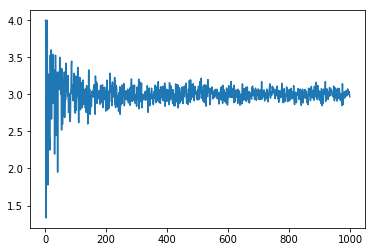

In [19]:
plt.plot(list(range(1, n)), estimaciones)

Dentro del circulo 784
Fuera del circulo 216


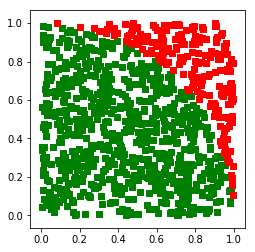

In [27]:
x_inside = []
y_inside = []
x_outside = []
y_outside = []
inside = 0

for _ in range(n):
    x = random.random()
    y = random.random()
    if x**2+y**2 <= 1:
        inside += 1
        x_inside.append(x)
        y_inside.append(y)
    else:
        x_outside.append(x)
        y_outside.append(y)

print(f"Dentro del circulo {inside}")
print(f"Fuera del circulo {n - inside}")
        
fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.scatter(x_inside, y_inside, color='g', marker='s')
ax.scatter(x_outside, y_outside, color='r', marker='s')       

## Estimar pi con el metodo de buffon